### Stock Market Analysis

In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [40]:
# from pandas.io.data import DataReader 
import pandas_datareader.data as web #allows users to import data into a pandas dataframe from multiple web sources
import yfinance as yf

In [14]:
from datetime import datetime

In [16]:
from __future__ import division

In [58]:
tech_list = ["AAPL","GOOG","MSFT","AMZN","TSLA"]

In [28]:
end= datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [60]:
for stock in tech_list:
    globals()[stock] = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [64]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,186.963952,188.583281,185.382680,187.017122,186.626386,6.020197e+07
std,15.785424,15.939178,15.434828,15.717509,15.852917,2.485452e+07
min,165.350006,166.399994,164.080002,165.000000,164.776505,6.361724e+06
25%,175.309998,177.080002,173.740005,175.460007,174.802902,4.696490e+07
50%,183.919998,185.149994,182.110001,184.119995,183.610962,5.379050e+07
75%,192.899994,194.399994,191.720001,192.580002,192.350006,6.603460e+07
max,236.479996,237.229996,233.089996,234.820007,234.820007,2.464214e+08


In [66]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-07-31 to 2024-07-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


<Axes: xlabel='Date'>

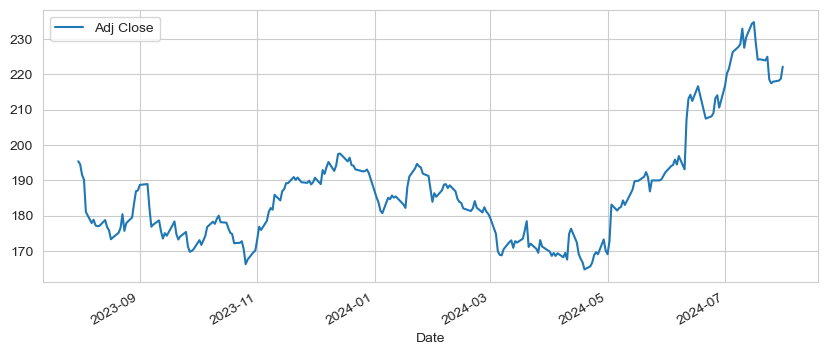

In [72]:
AAPL["Adj Close"].plot(legend=True,figsize=(10,4))

<Axes: xlabel='Date'>

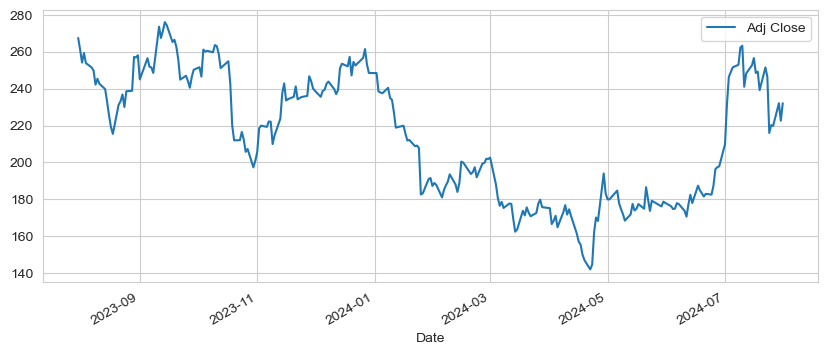

In [70]:
TSLA["Adj Close"].plot(legend=True,figsize=(10,4))

In [84]:
company_list = [AAPL, GOOG, MSFT, AMZN, TSLA]
company_dict = {name: globals()[name] for name in tech_list}

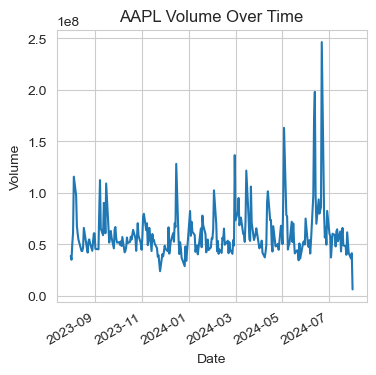

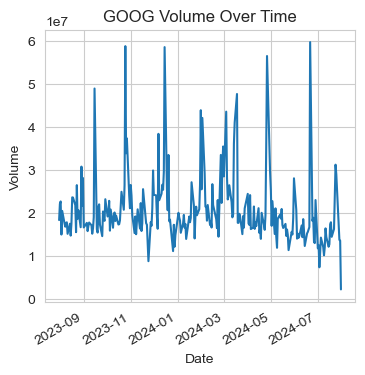

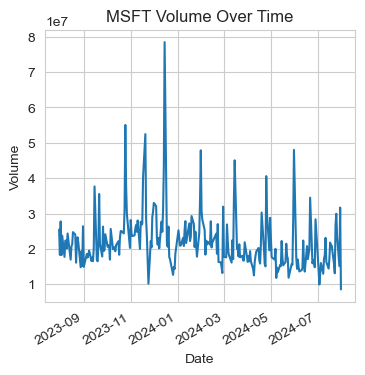

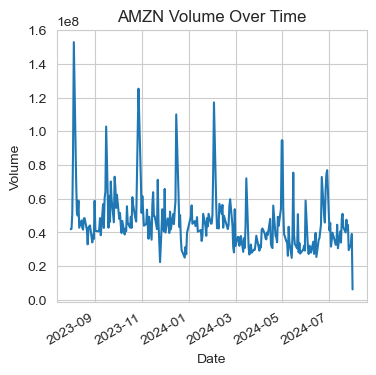

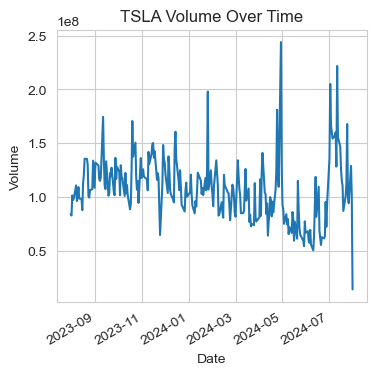

In [86]:
for name, df in company_dict.items():
    df["Volume"].plot(figsize=(4,4))
    plt.title(f"{name} Volume Over Time")
    plt.xlabel("Date")
    plt.ylabel("Volume")
    plt.show()

In [90]:
# calculated moving average for 10,20,50 days
ma_days = [10,20,50]

for ma in ma_days:
    column_name = "Moving Avg for %s days" %(str(ma))

    AAPL[column_name] = AAPL["Adj Close"].rolling(window=ma).mean()

<Axes: xlabel='Date'>

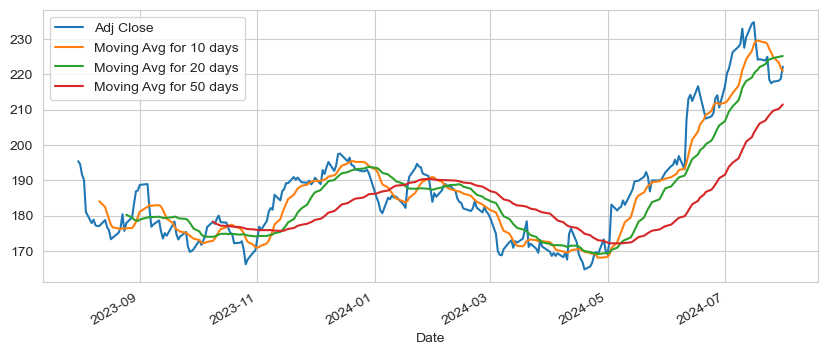

In [98]:
AAPL[["Adj Close","Moving Avg for 10 days","Moving Avg for 20 days","Moving Avg for 50 days"]].plot(subplots=False,figsize=(10,4))

<Axes: xlabel='Date'>

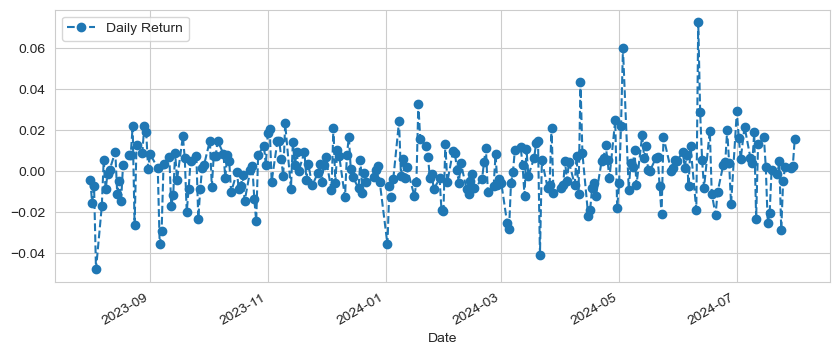

In [100]:
AAPL["Daily Return"] = AAPL["Adj Close"].pct_change()

AAPL["Daily Return"].plot(figsize=(10,4),legend=True,linestyle="--",marker="o")

Text(0.5, 1.0, 'Daily Return Distribution')

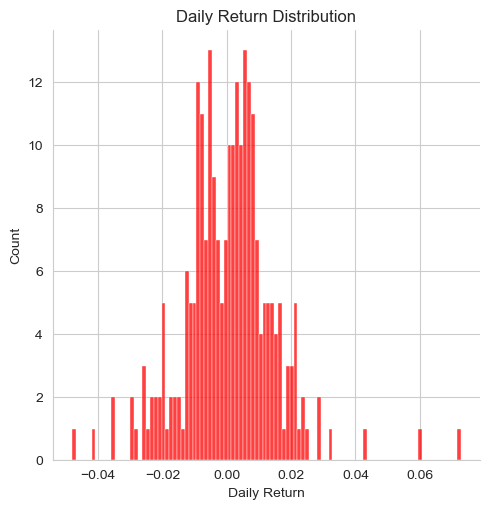

In [112]:
sns.displot(AAPL["Daily Return"].dropna(),bins=100,color="red")
plt.title("Daily Return Distribution")

In [116]:
closing_df = yf.download(tech_list,start,end)["Adj Close"]

[*********************100%%**********************]  5 of 5 completed


In [118]:
closing_df.head()

Ticker,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2023-07-31,195.412201,133.679993,132.958694,333.312622,267.429993
2023-08-01,194.576660,131.690002,131.740082,333.729340,261.070007
2023-08-02,191.562668,128.210007,128.493774,324.957947,254.110001
2023-08-03,190.160110,128.910004,128.623642,324.124481,259.320007
2023-08-04,181.028610,139.570007,128.393890,325.235779,253.860001


In [120]:
#comparison analysis plot, pair plot
tech_rates = closing_df.pct_change()

In [122]:
tech_rates.head()

Ticker,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2023-07-31,NaN,NaN,NaN,NaN,NaN
2023-08-01,-0.004276,-0.014886,-0.009165,0.001250,-0.023782
2023-08-02,-0.015490,-0.026426,-0.024642,-0.026283,-0.026660
2023-08-03,-0.007322,0.005460,0.001011,-0.002565,0.020503
2023-08-04,-0.048020,0.082693,-0.001786,0.003429,-0.021055


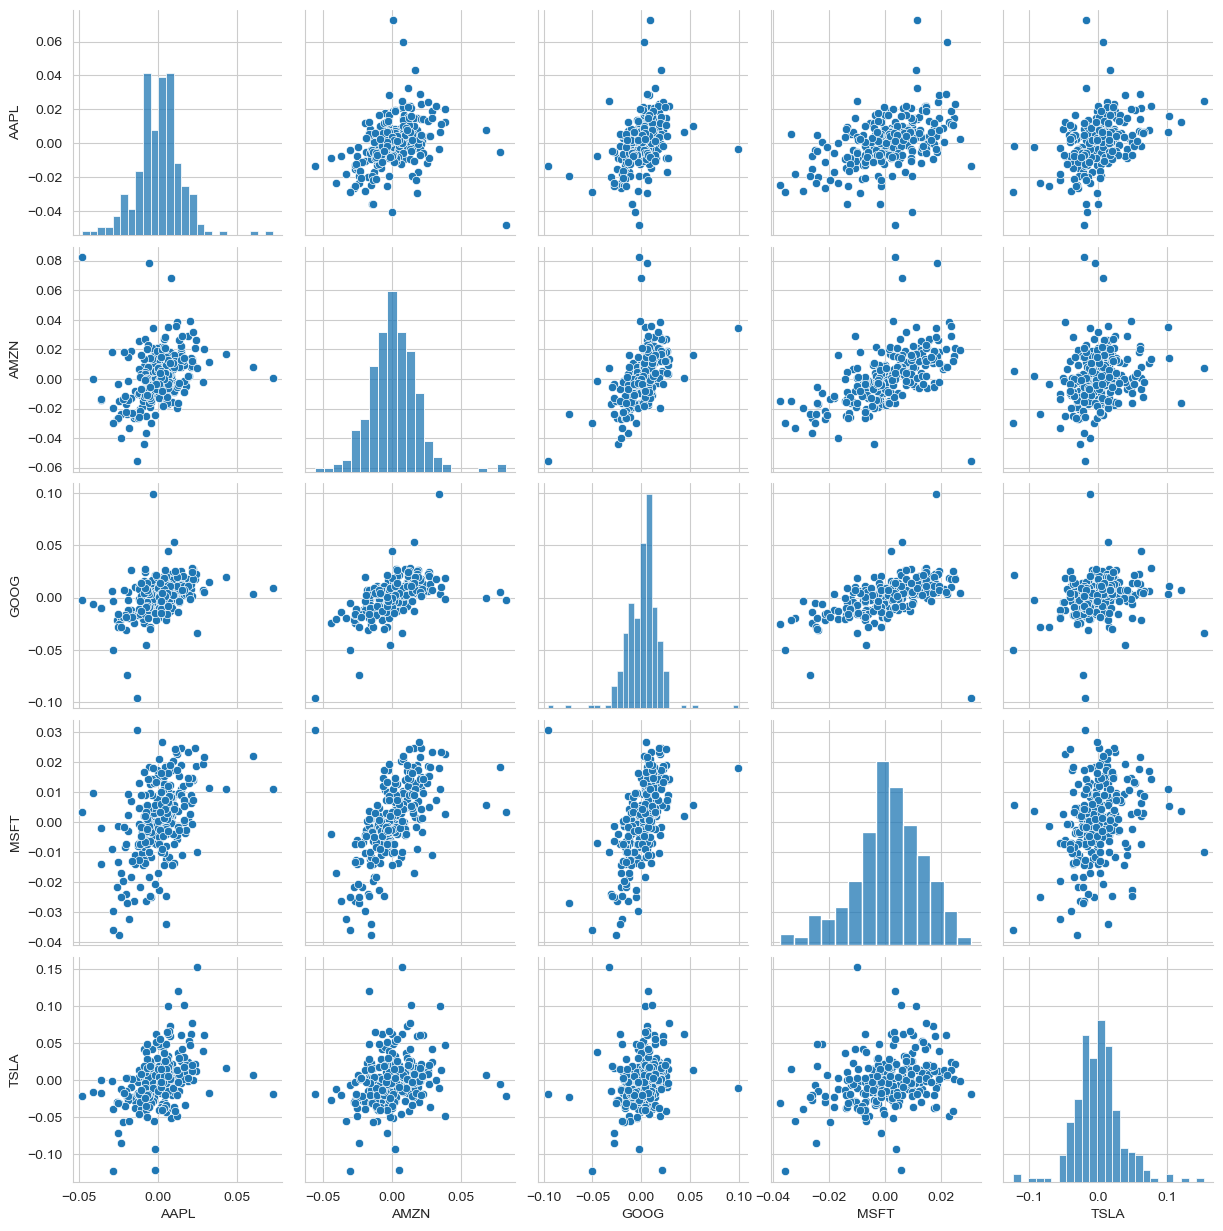

In [124]:
sns.pairplot(tech_rates.dropna())

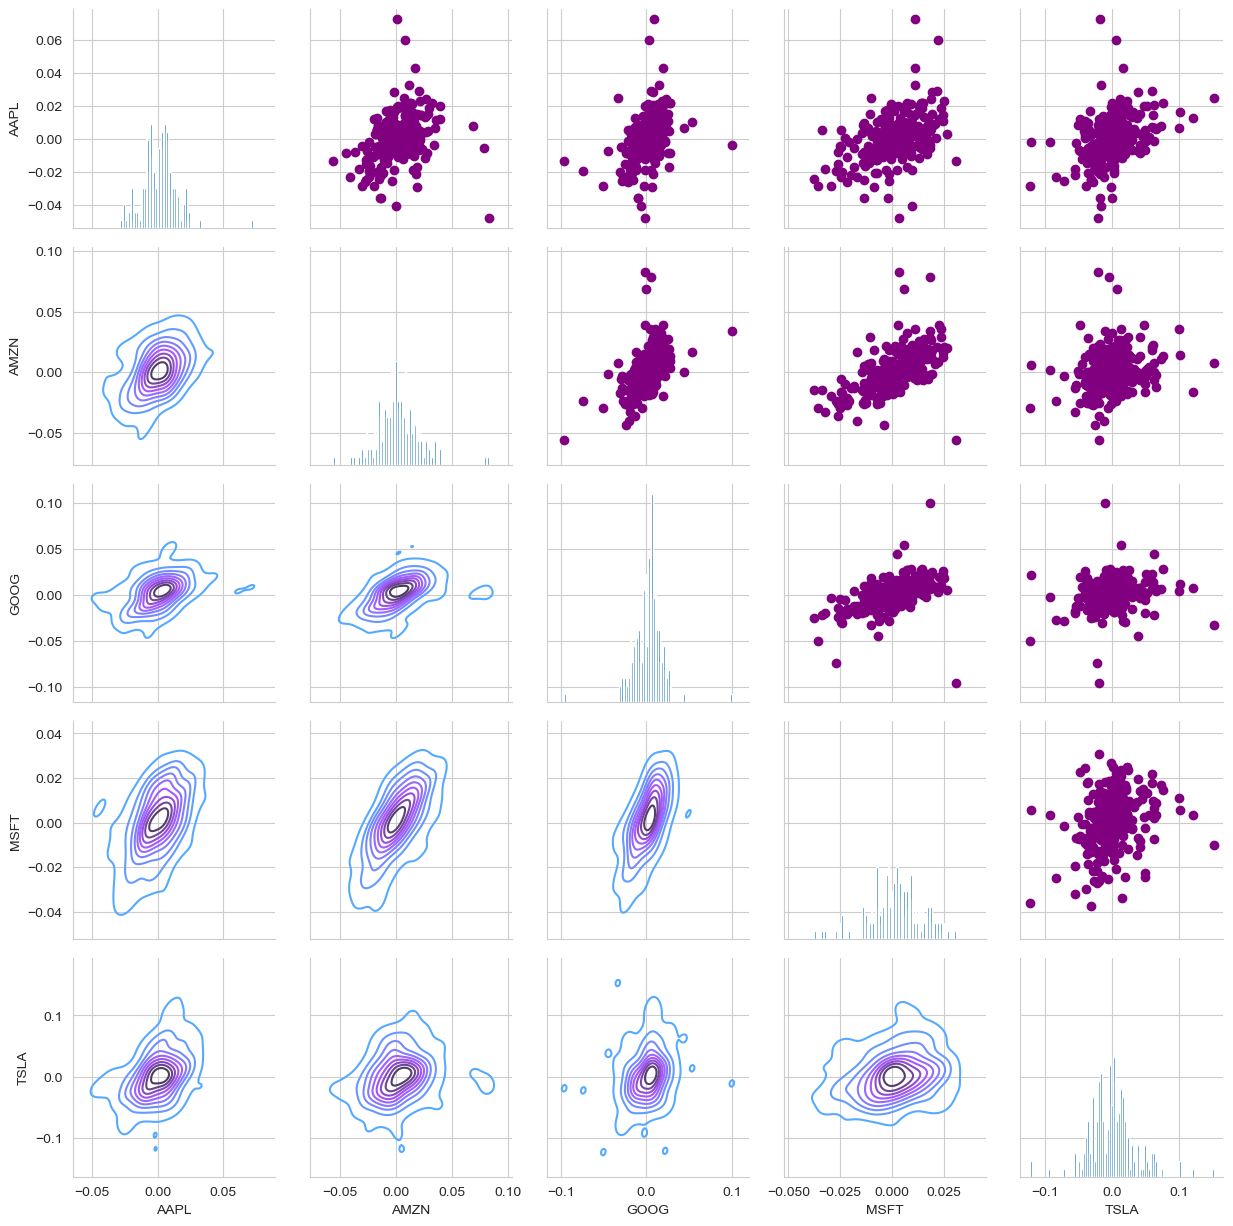

In [126]:
returns_fig = sns.PairGrid(tech_rates.dropna())
returns_fig.map_upper(plt.scatter,color="purple")
returns_fig.map_lower(sns.kdeplot,cmap="cool_d")
returns_fig.map_diag(plt.hist,bins=100)

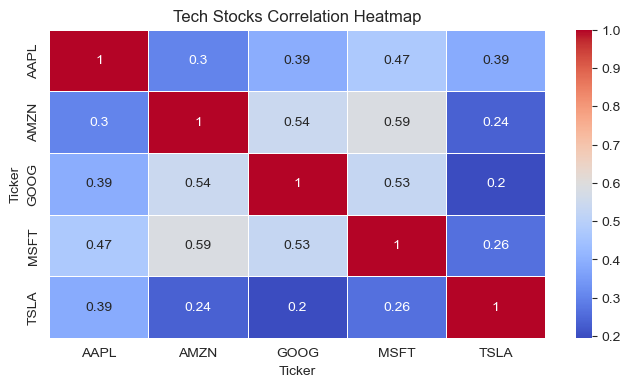

In [136]:
#sns.corrplot(tech_rates.dropna(),annot=True)
tech_corr = tech_rates.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(tech_corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Tech Stocks Correlation Heatmap")
plt.show()

In [138]:
rets = tech_rates.dropna()

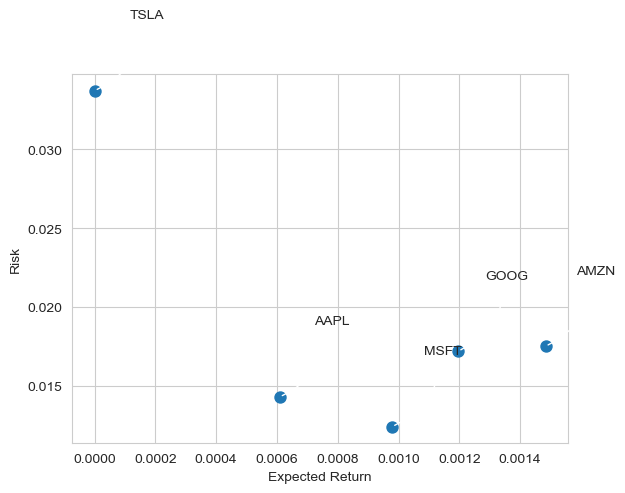

In [144]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel("Expected Return")
plt.ylabel("Risk")

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy=(x,y),xytext=(50,50),
        textcoords="offset points", ha="right", va="bottom",
        arrowprops = dict(arrowstyle="-",connectionstyle="arc3,rad=-0.3"))